In [2]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

In [5]:
d, info = matlab.loaddata('../../mat/strategy_270225.mat')

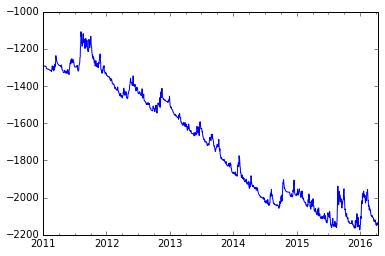

In [6]:
d.exo.plot();

In [7]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

## Wells Wilders ATR with original smothing

In [20]:
O = L = H = C = d.exo
period = 15



bc = len(C);
val = pd.Series(index=C.index)
v = 0.0
SumTR = 0.0
avg = 0.0

for i in range(bc):
    if i == 0:
        SumTR = H.values[i] - L.values[i]
    else:
        v = max(H.values[i] - L.values[i],
                max(abs(H.values[i] - C.values[i - 1]), abs(L[i] - C[i - 1]))
               )
        if i <= period-1:
            # Skipping points < period
            SumTR += v
            
            # First point is simple average
            if i == period-1:
                avg = SumTR / period;
        else:
            # Wilders smoothing
            avg = ((1.0 / period) * v + (1.0 - 1.0 / period) * avg);
            val[i] = avg


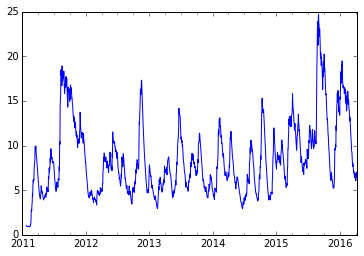

In [22]:
val.plot()